#### 1.(#sort) Implement three-way merge sort in Python. It should at a minimum accept lists of integers as input.

In [33]:
import sys # This library helps in adding a maximum value at the end of my array
import time # This library is used to calculate the running time of the algorithm.

start = time.time() # Time counting starts here
def Three_Way_merge(lis): 
    if len(lis)>1:  #
        if len(lis) == 2:
            n = len(lis)
            l = [lis[0]]
            m = [lis[1]]
            r = []
        else:
        
            n = len(lis) 
            n1 = n//3
            n2 = n//2
            
            
            l = lis[0:n1]
            m = lis[n1:n2+1]
            r = lis[n2+1:n]
            
        #print(l, m, r)
        Three_Way_merge(l)
        Three_Way_merge(m)
        Three_Way_merge(r)
        l.append(sys.maxsize)
        m.append(sys.maxsize)
        r.append(sys.maxsize)
        
        
        k = 0
        p = 0
        j = 0
        for i in range(n):
            

            if l[k] <= m[p] :
                if l[k] <= r[j]:
                    lis[i] = l[k]
                    k += 1
                elif r[j] <= m[p]:
                    lis[i] = r[j]
                    j+=1
                else:
                    lis[i] = m[p]
                    p+=1

                    
            else:
                if m[p] <= r[j]:
                    lis[i] = m[p]
                    p+=1
                else:
                    lis[i] = r[j]
                    j+= 1
                    
        return lis
        
lis = [3,5,6,8,0,-98,4323532523,242,-4,2314,2]



print(Three_Way_merge(lis))
end = time.time()
print('Running Time:',end - start)



[-98, -4, 0, 2, 3, 5, 6, 8, 242, 2314, 4323532523]
0.0010449886322


#### (#sort) 2.Implement a second version of three-way merge sort that calls insertion sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process.

In [37]:
import sys
import time


def Insort(lis):
    n = len(lis)
    for i in range(n-1):
        flag = True
        while flag:
            
            
            l = lis[i+1]
            x = lis[i]
            if lis[i+1] < lis[i]:
                 lis[i] = l
                 lis[i+1] = x
            if i ==0:
                 flag = False
            else:
                 i = i -1

    return lis


start = time.time()
def Three_Way_merge_2(lis):
    if len(lis)<= 20:
        Insort(lis)
    else:
        
        
        
        n = len(lis) 
        n1 = n//3
        n2 = n//2
                       
        l = lis[0:n1]
        m = lis[n1:n2+1]
        r = lis[n2+1:n]
        #print(l, m, r)
        Three_Way_merge_2(l)
        Three_Way_merge_2(m)
        Three_Way_merge_2(r)
       
        l.append(sys.maxsize)
        m.append(sys.maxsize)
        r.append(sys.maxsize)
        
        
        
        k = 0
        p = 0
        j = 0
        for i in range(n):
            if l[k] <= m[p] :
                if l[k] <= r[j]:
                    lis[i] = l[k]
                    k += 1
                elif r[j] <= m[p]:
                    lis[i] = r[j]
                    j+=1
                else:
                    lis[i] = m[p]
                    p+=1

                    
            else:
                if m[p] <= r[j]:
                    lis[i] = m[p]
                    p+=1
                else:
                    lis[i] = r[j]
                    j+= 1
                                
    return lis
        


A = [2,3,6,3,2,8,98,7,65,4,567543,23,4]
print(Three_Way_merge_2(A))
end = time.time()

print('Running Time:',end - start)


[2, 2, 3, 3, 4, 4, 6, 7, 8, 23, 65, 98, 567543]
('Running Time:', 0.0008800029754638672)


#### 3.(#complexity, #optimalalgorithm) Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the augmented merge sort from (2). Make sure to define what each algorithm's complexity is and to enumerate the explicit assumptions made to assess each algorithm's run time. Your results should be presented in a table, along with an explanatory paragraph and any useful graphs or other charts to document your approach. Part of your analysis should indicate whether or not there is a “best” variation. Compare your benchmarks with the theoretical result we have discussed in class.

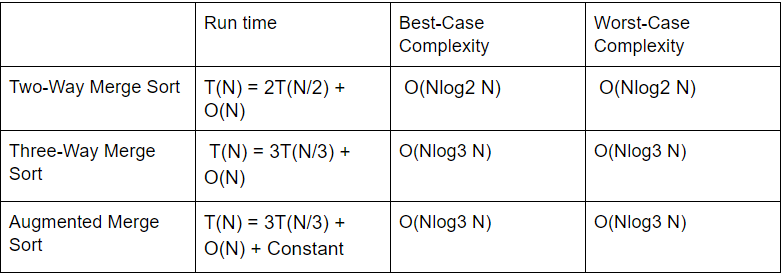

In [28]:
from IPython.display import Image
Image(filename='table.PNG')


I will suppose that the three algorithms will run on the same software that has the RAM and operations power.

The Two-way Merge Sort implements a recursion that  divides the list into two equals array each time and then implements a recursion until the array length becomes 1. So the divide steps takes a constant time regardless on the input size =  O(1). The conquer step is where the recursion happens, so if we assume that the run time of the algorithm is T(N) then the conquer step takes 2T(N/2) time.
The combine step merges a total of n elements so it takes O(N).

So the total run time of the two way merge sort is T(N) = 2T(N/2) + O(N) + 1 which also can be expressed as T(N) = 2T(N/2) + cN

Using a recursion tree we find that the root of the tree starts at n and then keeps dividing into two nodes with N/2 until the node values reaches 1 and at that point the cost will be( 2^i * N/2^i) which will happen after log2 N times where the log2 is of the base 2 . So the total run time complexity is the summation of ( 2^i * N/2^i) from i = 0 until log2 N. Which equals O(Nlog2 N). And that will be the time complexity for merge sort in all the cases.


Similar to the two way merge sort, three way merge sort have a similar analysis except that the list will be divided into three sublists each time. And that means that it will take the list log to the base of three recuressions until it reaches 1. And then the total run time should be the summation of ( 3^i *  N/3^i) from i = zero until Log3 N where log is of the base 3. Which equals O(Nlog3 N) And that is the run time complexity for merge sort in all the cases.

For the augmented three way merge sort. The insertion sort has a run time complexity of O(n^2), when we add insertion sort to the three way merge sort where insertion sort works on the lists with size of n then the recursion of the three way merge algorithm will keep running until the list size is n and that will take (log3 N -n/3) levels and then the insertion sort algorithm will start with an array of input size n. That will make the running time complexity of the augmented algorithm T(N) = 3T(N/3) + O(N) + O(n^2) where N is the input size of the main array and n is the size of the small sub-array, it’s the number that I choose for the insertion sort to start. We can note that O(n^2) will generally take longer running time than O(Nlog3 N) for large values of n but for small numbers, O(n^2) growth rate will be less than O(Nlog3 N) so in my algorithm when I make n a small number (like 2 as I did) the run time complexity of the augmented three-way merge sort array will still be O(Nlog3 N) because the time that the insertion sort will take to sort a list of 2 numbers is very small in comparison to the time the three-way merge sort algorithm will take to sort a list of (N-2). However, if I choose the n to be a large number which means giving a large number to the insertion sort algorithm, the running time complexity will be O(n^2) for the worst case.



Looking at the graph below that shows the running time of the different algorithms, we can see that the three-way merge algorithm has the lowest run time and so by assuming that the operation power and the RAM are the same then the three-way merge sort is the best one in terms of the running time. However, Three-way merge sort may take more space because it uses more arrays to store the sorted numbers.


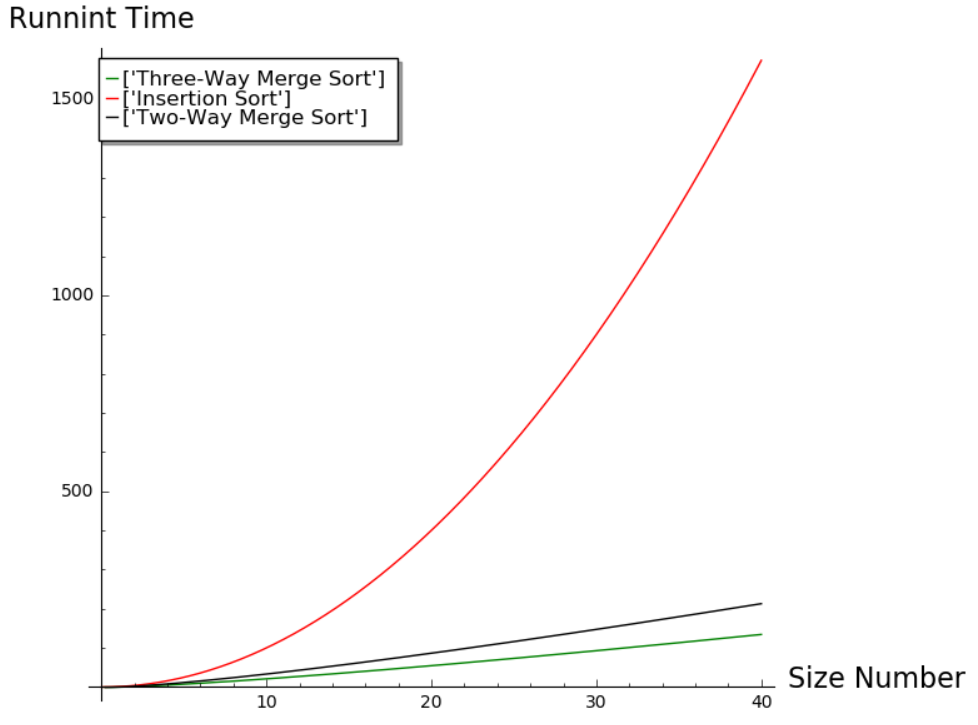

In [31]:
from IPython.display import Image
Image(filename='run time.PNG')
#Plot made using SageMath tool